# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import os.path as path
import os

# TODO: Fill this in based on where you saved the training and testing data
training_file =  'data/train.p'
validation_file= 'data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import numpy as np
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
train_features = train['features']
train_labels = train['labels']
n_train = train_features.shape[0]

valid_features = valid['features']
valid_labels=valid['labels']
n_valid = valid_features.shape[0]

test_features = test['features']
test_labels = test['labels']

# TODO: Number of testing examples.

n_test = test_features.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = train_features.shape[1:3]

# TODO: How many unique classes/labels there are in the dataset.

n_classes = len(np.unique(train_labels))



print("Number of training examples =", n_train)
print("Number of valid examples =", n_valid)
print("Number of test examples =", n_test)

print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print("Chanel of image = ",train_features.shape[3])
print('Max feature in test = ',train_features.max())
print('Min feature in test = ',train_features.min())


Number of training examples = 34799
Number of valid examples = 4410
Number of test examples = 12630
Image data shape = (32, 32)
Number of classes = 43
Chanel of image =  3
Max feature in test =  255
Min feature in test =  0


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

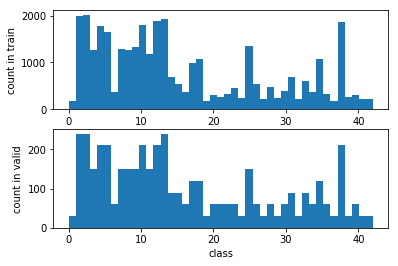

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

plt.subplot(2,1,1)
plt.hist(train_labels,n_classes)
plt.xlabel('class')
plt.ylabel('count in train')

plt.subplot(2,1,2)
plt.hist(valid_labels,n_classes)
plt.xlabel('class')
plt.ylabel('count in valid')
plt.savefig('distributionAlongClass.png')
plt.show()


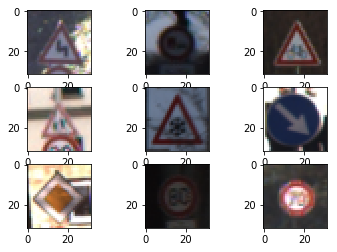

In [4]:
import random

random.seed()

size = len(train_features)
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(train_features[random.randint(1,size)])
plt.savefig('randomImages.png')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import tensorflow as tf
import cv2
from skimage import exposure
from skimage import transform
def grayscale(imgs):
    result = []
    for img in imgs:
        gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
        gray = np.expand_dims(gray,axis=gray.ndim)
        result.append(gray)
    return np.array(result)
def normalize(features):
    max = 255
    min = 0
    low_bound = 0
    high_bound = 1
    return low_bound + (features - min)*(high_bound-low_bound)/(max-min)

def equalize_hist(example):
    for i,j in enumerate(example):
        example[i] = exposure.equalize_hist(j)
    return example


# processed_train_features = grayscale(train_features)
processed_train_features = normalize(train_features)


# processed_valid_features = grayscale(valid_features)
processed_valid_features = normalize(valid_features)


# processed_test_features = grayscale(test_features)
processed_test_features = normalize(test_features)

assert processed_train_features.shape[3] == 3

print('Precessed')

Precessed


### Augment Training set

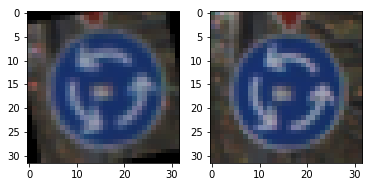

In [6]:
def add_rotate(examples,labels):
    # TODO rise a illegal argument exception,like java
    if examples.shape[0] != labels.shape[0]:
        return
    
    result_examples = []
    result_labels = []
    for i,j in enumerate(examples):
        result_examples.append(j)
        result_examples.append(transform.rotate(j,angle=random.randint(-15,15),preserve_range=True))
        result_labels.append(labels[i])
        result_labels.append(labels[i])
    return np.array(result_examples),np.array(result_labels)


processed_train_features,processed_train_labels= add_rotate(processed_train_features,train_labels)
size = len(processed_train_features)
start = random.randint(1,size)
plt.subplot(1,2,1)
plt.imshow(processed_train_features[start])
plt.subplot(1,2,2)
plt.imshow(processed_train_features[start+1])
plt.savefig('augmentedImage.jpg')
plt.show()

### Model Architecture

In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
def Model(Ｘ,keep_prob):
    #first layer conv,output 28x28x4
    mu = 0
    sigma = 0.1
    
    
    conv1_W = tf.Variable(tf.truncated_normal([5,5,3,6],mu,sigma))
    conv1_b = tf.Variable(tf.truncated_normal([6],mu,sigma))
    
    conv1 = tf.nn.conv2d(X,
                        conv1_W,
                        strides=[1,1,1,1],
                        padding='VALID')
    conv1 = tf.nn.bias_add(conv1,conv1_b)
    
    conv1 = tf.nn.relu(conv1)
    #first pool layer,output 14x14x4
    pool1 = tf.nn.max_pool(conv1,
                          ksize=[1,2,2,1],
                          strides=[1,2,2,1],
                          padding='VALID')
    #second conv layer,output 10x10x16
    conv2_W = tf.Variable(tf.truncated_normal([5,5,6,16],mu,sigma))
    conv2_b = tf.Variable(tf.truncated_normal([16],mu,sigma))
    conv2 = tf.nn.conv2d(pool1,
                        conv2_W,
                        strides=[1,1,1,1],
                        padding='VALID')
    conv2 = tf.nn.bias_add(conv2,conv2_b,name='conv2')
    conv2 = tf.nn.relu(conv2)
    
    #second pool layer,output 5x5x16
    pool2 = tf.nn.max_pool(conv2,
                          ksize=[1,2,2,1],
                          strides=[1,2,2,1],
                          padding='VALID')
    #flatten
    flatten = tf.contrib.layers.flatten(pool2)
    #first full layer
    full1_W = tf.Variable(tf.truncated_normal([400,120],mu,sigma))
    full1_b = tf.Variable(tf.truncated_normal([120],mu,sigma))
    full1 = tf.add(tf.matmul(flatten,full1_W),full1_b)
    
    full1 = tf.nn.relu(full1)
    full1 = tf.nn.dropout(full1,keep_prob)
    
    
    #second full layer
    full2_W = tf.Variable(tf.truncated_normal([120,84],mu,sigma))
    full2_b = tf.Variable(tf.truncated_normal([84],mu,sigma))
    full2 = tf.add(tf.matmul(full1,full2_W),full2_b)
    
    full2=tf.nn.relu(full2)
    full2 = tf.nn.dropout(full2,keep_prob)
    
    #third full layer 
    full3_W = tf.Variable(tf.truncated_normal([84,n_classes],mu,sigma))
    full3_b = tf.Variable(tf.truncated_normal([n_classes],mu,sigma))
    logits = tf.add(tf.matmul(full2,full3_W),full3_b,name='final')
    
    return logits
    
    
        

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [8]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle

X = tf.placeholder(tf.float32,(None,32,32,3))
y = tf.placeholder(tf.int32,(None))
one_hot_y = tf.one_hot(y,n_classes)

keep_prob = 0.75
logits = Model(X,keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=one_hot_y)
loss = tf.reduce_mean(cross_entropy)

learning_rate = tf.placeholder(tf.float32)
optimizer = tf.train.AdamOptimizer(learning_rate)
train_operation = optimizer.minimize(loss)

In [9]:
predict_result = tf.argmax(logits,1)
correct_prediction = tf.equal(predict_result,tf.argmax(one_hot_y,1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

def evaluate(session,examples,labels,batch=100):
    num_examples = len(examples)
    accuracy_total = 0
    loss_total = 0
    for offset in range(0, num_examples,batch):
        batch_x, batch_y = examples[offset:offset+batch], labels[offset:offset+batch]
        loss_batch,accuracy_batch = session.run([loss,accuracy_operation],feed_dict={X: batch_x, y: batch_y})
        accuracy_total += (accuracy_batch * batch)
        loss_total += loss_batch * batch
    return loss_total /num_examples,accuracy_total / num_examples

In [10]:
import time
def timing(func):
    def wrapper(*args,**kwargs):
        start = time.time()
        func(*args,**kwargs)
        end = time.time()
        print('function {}\'s running time is: {}'.format(func.__name__,end-start))
    return wrapper

@timing
def train_model(rate,batch_size,epoch,save=False):
    rate = rate
    epoch = epoch
    BATCH_SIZE = batch_size


    batches_valid_accuracy = []
    batches_train_accuracy = []
    batches_train_losses=[]
    batches_valid_losses=[]
    batches=[]
    log_stride = 50
    saver = tf.train.Saver()

    with tf.Session() as session:
        init = tf.global_variables_initializer()
        session.run(init)
        num_examples = len(processed_train_features)

        print('Training...')
        for i in range(epoch):
            shuffled_train_features,shuffled_train_labels = shuffle(processed_train_features,processed_train_labels)
            batch_position = 0
            for offset in range(0,num_examples,BATCH_SIZE):
                end  = offset + BATCH_SIZE
                batch_position +=1
                batch_samples = shuffled_train_features[offset:end]
                batch_labels = shuffled_train_labels[offset:end]
                session.run(train_operation,feed_dict={X:batch_samples,y:batch_labels,learning_rate:rate})

                if batch_position%log_stride == 0:
                    loss,accuracy = evaluate(session,processed_train_features,processed_train_labels,BATCH_SIZE)
                    batches_train_accuracy.append(accuracy)
                    batches_train_losses.append(loss)
                    loss,accuracy = evaluate(session,processed_valid_features,valid_labels,BATCH_SIZE)
                    batches_valid_accuracy.append(accuracy)
                    batches_valid_losses.append(loss)
                    
                    last_size = batches[-1] if batches else 0
                    batches.append(last_size + log_stride*BATCH_SIZE)
                   
            _,valid_accuracy = evaluate(session,processed_valid_features,valid_labels,BATCH_SIZE)
            _,train_accuracy = evaluate(session,processed_train_features,processed_train_labels,BATCH_SIZE)

            print('Epoch ',i)
            print('train accuracy is: {}'.format(train_accuracy))
            print('validation accuracy is: {}'.format(valid_accuracy))


        plt.figure(1)
        plt.subplot(2,1,1)
        plt.title('Accuracy')
        plt.plot(batches,batches_train_accuracy,'r',label='Train accuracy')
        plt.plot(batches,batches_valid_accuracy,'x',label='Valid accuracy')
        plt.subplot(2,1,2)
        plt.title('Loss')
        plt.plot(batches,batches_train_losses,'b')
        plt.plot(batches,batches_valid_losses,'gx')
        
        plt.savefig('LeNet_%s_%d_%d_%s' % (str(rate)[2:0],batch_size,epoch,str(keep_prob)[2:0]))
        plt.show()
        

        print('train accuracy is: {}'.format(train_accuracy))
        print('validation accuracy is: {}'.format(valid_accuracy))
#         assert valid_accuracy > 0.93 'less than 0.93'

        if save:
            if not os.path.exists('model'):
                os.makedirs('model')
            saver.save(session,'./model/classifier')
            print('saved')


##### determine batch size,learning rate,epoch

In [31]:
#let me do some contrast test to decide learning_rate,batch_size
for i in [0.001,0.0008,0.0005]:
    train_model(i,100,3)
    
for i in [50,100,200]:
    train_model(0.001,i,3)


##### Train model

Training...
Epoch  0
train accuracy is: 0.7701311996870094
validation accuracy is: 0.7498866049340522
Epoch  1
train accuracy is: 0.8726801838750534
validation accuracy is: 0.8369614450839642
Epoch  2
train accuracy is: 0.9122215527622017
validation accuracy is: 0.8637188175638246
Epoch  3
train accuracy is: 0.9308011370858412
validation accuracy is: 0.8911564628553499
Epoch  4
train accuracy is: 0.9459176839687738
validation accuracy is: 0.8988662087728106
Epoch  5
train accuracy is: 0.9534612975006401
validation accuracy is: 0.9142857141235248
Epoch  6
train accuracy is: 0.9578145771739969
validation accuracy is: 0.9204081599674527
Epoch  7
train accuracy is: 0.9648547125888997
validation accuracy is: 0.9219954613925648
Epoch  8
train accuracy is: 0.9625132795435152
validation accuracy is: 0.929251698409619
Epoch  9
train accuracy is: 0.9709043257393856
validation accuracy is: 0.9297052086616049
Epoch  10
train accuracy is: 0.9744389073808096
validation accuracy is: 0.941950111162094

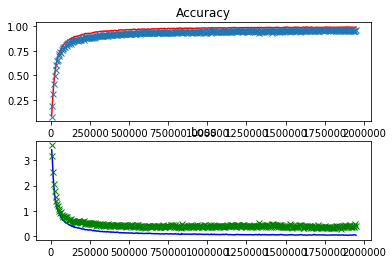

train accuracy is: 0.9882898753790846
validation accuracy is: 0.9535147394993408
saved
function train_model's running time is: 1115.418963432312


In [12]:
train_model(0.001,100,30,True)

##### Test

In [19]:
with tf.Session() as session:
    saver = tf.train.Saver()
    saver.restore(session,'./model/classifier')
    print('Test accuracy is :',evaluate(session,test_features,test_labels)[1])


Test accuracy is : 0.905779904538


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

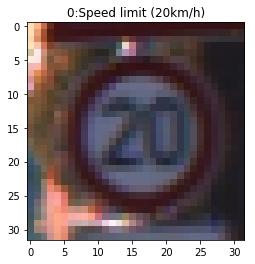

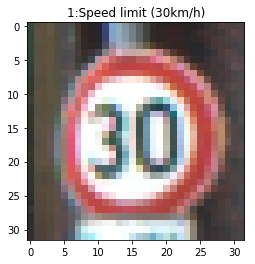

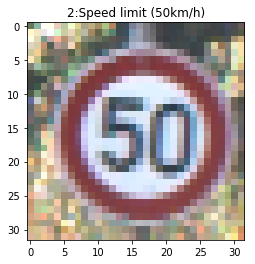

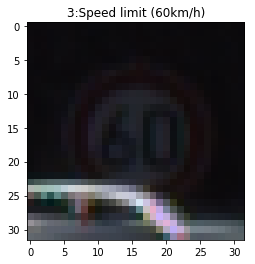

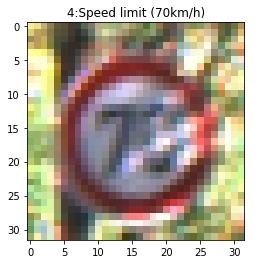

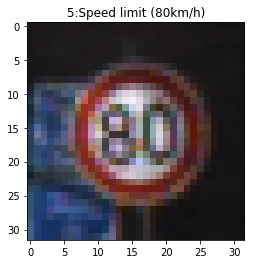

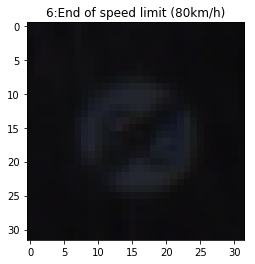

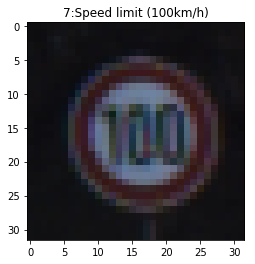

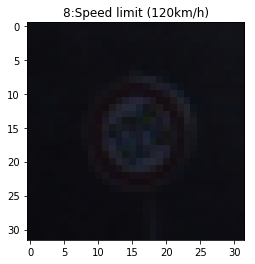

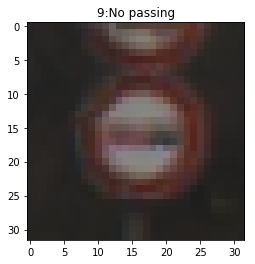

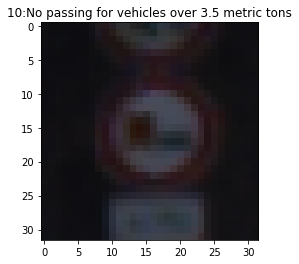

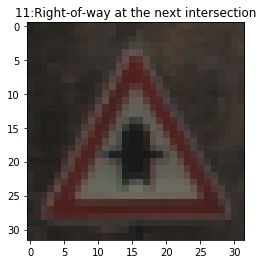

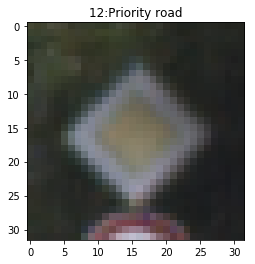

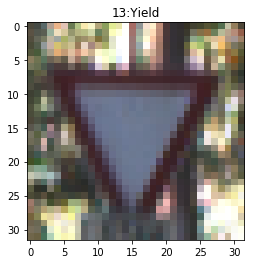

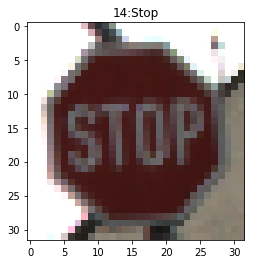

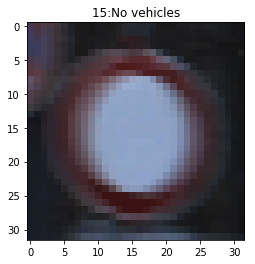

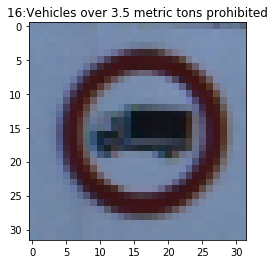

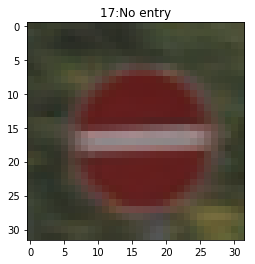

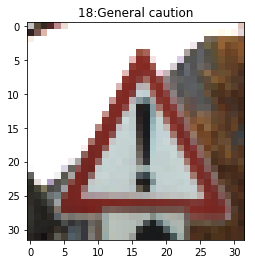

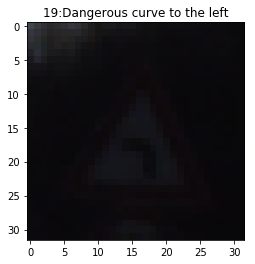

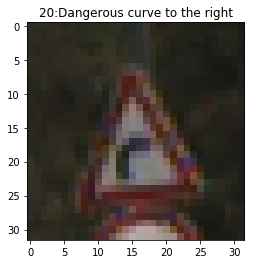

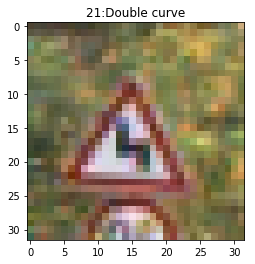

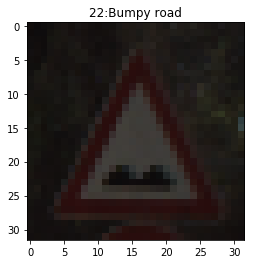

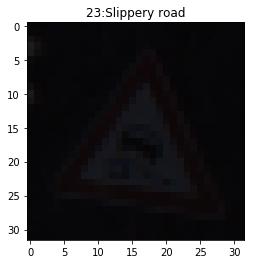

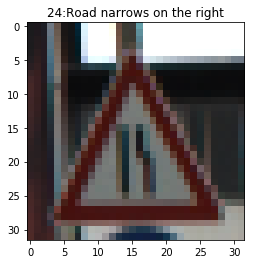

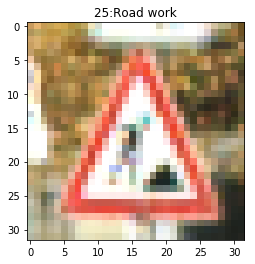

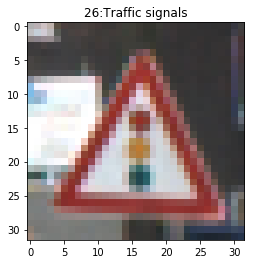

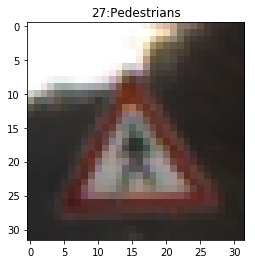

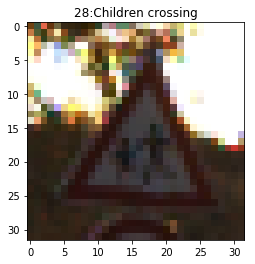

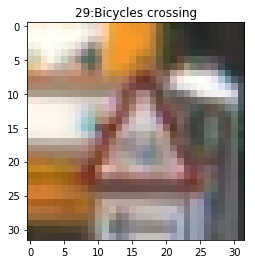

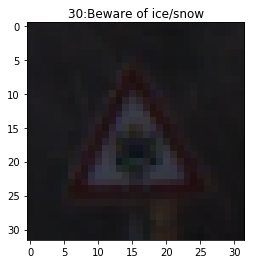

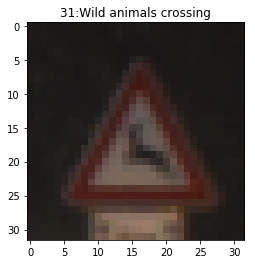

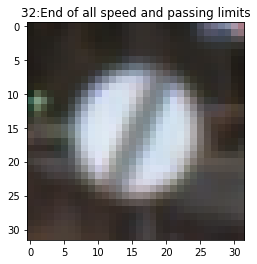

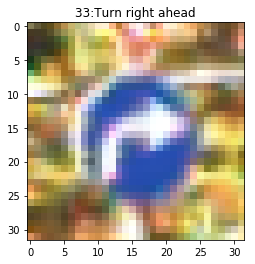

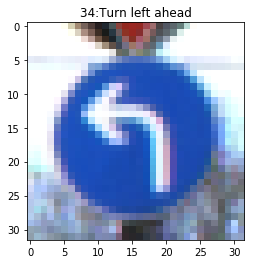

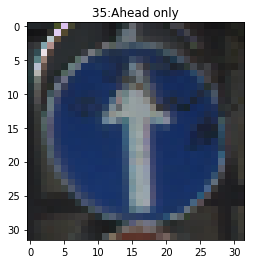

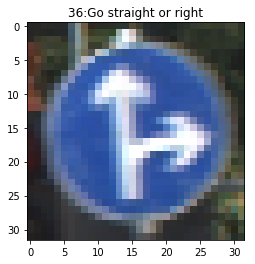

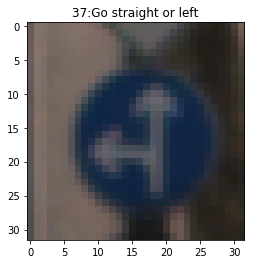

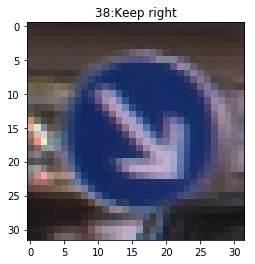

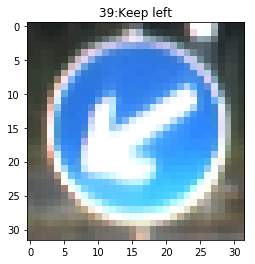

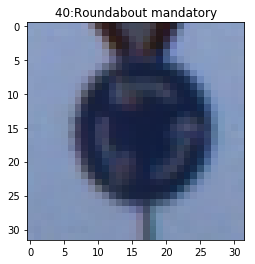

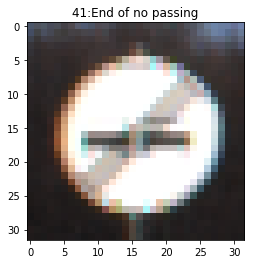

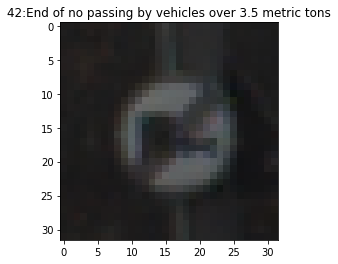

In [12]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import os.path as path
import csv

# reader() return _csv.reader object
classes_map = {}
with open('signnames.csv',mode='r') as f:
    signnames_reader = csv.reader(f)
    signnames_reader.__next__()
    for row in signnames_reader:
        classes_map[row[0]]=row[1]

def class_name(i):
    if str(i) in classes_map:
        return classes_map[str(i)]
    
        
all_signs = []
for i in range(n_classes):
    i_index = test_labels.tolist().index(i)
    all_signs.append(test_features[i_index])
for i,j in enumerate(all_signs):
    plt.title(str(i) + ':' +  class_name(i))
    plt.imshow(j)
    plt.show()

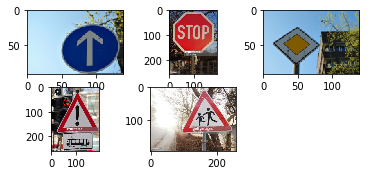

In [13]:
new_test_imgs = []
new_images_dir = 'new'
for p in os.listdir(new_images_dir):
    new_test_imgs.append(mpimg.imread(path.join(new_images_dir,p)))

plt.title('New Sign')
def showImgs(imgs):
    for i,j in enumerate(imgs):
        plt.subplot(3,3,i+1)
        plt.imshow(j)
    plt.show()

showImgs(new_test_imgs)

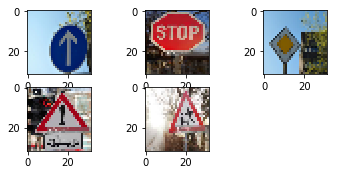

In [14]:
from skimage.transform import resize
import numpy as np

def resizeImgTo3232(imgs):
    resized_imgs = []
    for i in imgs:
        copy = np.copy(i)
        resized_imgs.append(resize(i,[32,32]))
    return resized_imgs

copyed_test_imgs = resizeImgTo3232(new_test_imgs)
copyed_test_imgs = np.array(copyed_test_imgs)
showImgs(copyed_test_imgs)
copyed_test_imgs = normalize(copyed_test_imgs)
copyed_test_imgs = copyed_test_imgs.astype(np.float32)

In [15]:
new_test_labels = [35,14,12,18,28]

### Predict the Sign Type for Each Image

In [19]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.


### Analyze Performance

In [20]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [28]:
with tf.Session() as session:
    saver = tf.train.Saver()
    saver.restore(session,'./model/classifier')
    top_5 = tf.nn.top_k(tf.nn.softmax(logits),5)
    test_result,top_5_result = session.run([predict_result,top_5],feed_dict={X:copyed_test_imgs})
    for i,j in enumerate(test_result):
        print('Real class is {},predict is {},{} '.format(new_test_labels[i],j , class_name(j)))
    
    class_names = []
    for i in top_5_result.indices.ravel():
        class_names.append(class_name(i))
    class_names = np.array(class_names).reshape(top_5_result.indices.shape)
    
    print(class_names)
    print(top_5_result.values)
    
    accuracy = np.equal(test_result,new_test_labels).sum()/copyed_test_imgs.shape[0]
    print('accuracy is ',accuracy)    

    

Real class is 35,predict is 14,Stop 
Real class is 14,predict is 25,Road work 
Real class is 12,predict is 11,Right-of-way at the next intersection 
Real class is 18,predict is 5,Speed limit (80km/h) 
Real class is 28,predict is 14,Stop 
[['Stop' 'No entry' 'End of all speed and passing limits'
  'Right-of-way at the next intersection' 'Speed limit (60km/h)']
 ['Road work' 'Speed limit (80km/h)'
  'Right-of-way at the next intersection' 'Priority road'
  'Dangerous curve to the right']
 ['Right-of-way at the next intersection' 'Priority road'
  'Speed limit (60km/h)' 'Speed limit (80km/h)' 'Stop']
 ['Speed limit (80km/h)' 'Priority road' 'Dangerous curve to the right'
  'Road work' 'No passing for vehicles over 3.5 metric tons']
 ['Stop' 'Speed limit (60km/h)' 'Speed limit (80km/h)' 'No entry'
  'End of all speed and passing limits']]
[[ 0.74053931  0.12007201  0.09885066  0.01157169  0.00732872]
 [ 0.43950483  0.13144864  0.1277349   0.11642809  0.0463834 ]
 [ 0.32114258  0.14470404  

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


Tensor("conv2:0", shape=(?, 10, 10, 16), dtype=float32)
(5, 10, 10, 16)


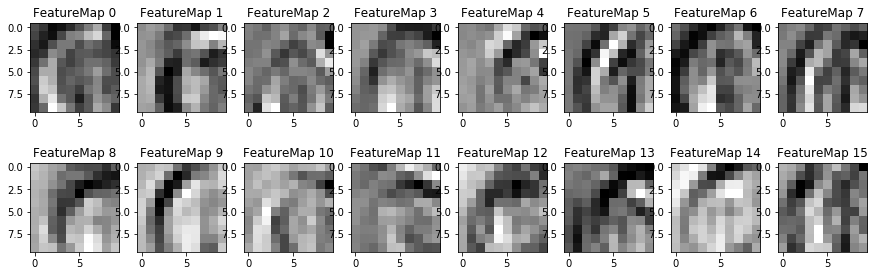

In [30]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
#     print(image_input)
    print(tf_activation)
    activation = tf_activation.eval(session=session,feed_dict={X : image_input})
    print(activation.shape)
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
            
            
with tf.Session() as session:
    saver.restore(session,'./model/classifier')
    outputFeatureMap(copyed_test_imgs,session.graph.get_tensor_by_name('conv2:0'))

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

From the FeatureMap images when can tell two main feature in Ahead Only sign.
* FeatureMap 7 recognizes the up arrow in the Ahead Only sign
* FeatureMap 8,FeatureMap 9 recognized the round circle 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 